# Formative Assessment

k-Means puts data points in predetermined clusters. There is another algorithm allows the learning algorithm to determine the number of clusters. This is a hierarchical clustering algorithm. An agglomerative clustering algorithm builds clusters using a bottom up approach. Each data point starts off in its own cluster. The algorithm then iteratively combines clusters until it forms one cluster. 

The results of the algorithm are shown using a dendogram. A dendogram is an upside down tree. At the bottom are the singleton clusters or clusters with single data points. At the top of the tree is a root, or the single cluster. 

### The data

The dataset was downloaded from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Air+quality) and "contains 9358 instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device. The device was located on the field in a significantly polluted area, at road level, within an Italian city. Data were recorded from March 2004 to February 2005, for one year. Hourly averaged concentrations for CO, Non Metanic Hydrocarbons, Benzene, Total Nitrogen Oxides (NOx) and Nitrogen Dioxide (NO2) were provided by a co-located reference certified analyzer. Missing values are tagged with -200 value."

The following are the descriptions of the columns we will be working with:

    0 Date (DD/MM/YYYY)
    1 Time (HH.MM.SS)
    2 True hourly averaged concentration CO in mg/m^3 (reference analyzer)
    3 PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted)
    4 True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer)
    5 True hourly averaged Benzene concentration in microg/m^3 (reference analyzer)
    6 PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted)
    7 True hourly averaged NOx concentration in ppb (reference analyzer)
    8 PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NOx targeted)
    9 True hourly averaged NO2 concentration in microg/m^3 (reference analyzer)
    10 PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted)
    11 PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 targeted)
    12 Temperature in °C
    13 Relative Humidity (%)
    14 AH Absolute Humidity 
    

### The goal
The goal of the assessment is to determine the optimal number of clusters for the learning algorithm. Use the agglomerative clustering technique in the `scipy` package to do this. Use the dataset `AirQualityUCI.csv`. More specifically, determine if there is a relationship between the predictor features `PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted)` and `True hourly averaged Benzene concentration in microg/m^3 (reference analyzer)`

### Import the libraries

Import the necessary libraries for file manipulation and learning algorithms. Do not forget to upload the visualizations packages as well.

In [85]:
from sklearn.cluster import KMeans
import pandas as pd
import seaborn as sb
import numpy as np
from numpy import arange
import matplotlib.pyplot as plt

In [86]:
%matplotlib inline

In [87]:
%cd C:\Users\Teboho\Desktop\ALU\ML\ALU ML\ml_05_notebook_submission

C:\Users\Teboho\Desktop\ALU\ML\ALU ML\ml_05_notebook_submission


In [88]:
data = pd.read_csv('AirQualityUCI.csv')

In [89]:
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,AH
0,10/03/2004,18.00.00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,0.7578
1,10/03/2004,19.00.00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,0.7255
2,10/03/2004,20.00.00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,0.7502
3,10/03/2004,21.00.00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,0.7867
4,10/03/2004,22.00.00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,0.7888


### Preprocess the data

Observe that there a missing values in the dataset. Imput missing values with the mean or median. Can you make any suggestions for standardizing or normalising the data points?

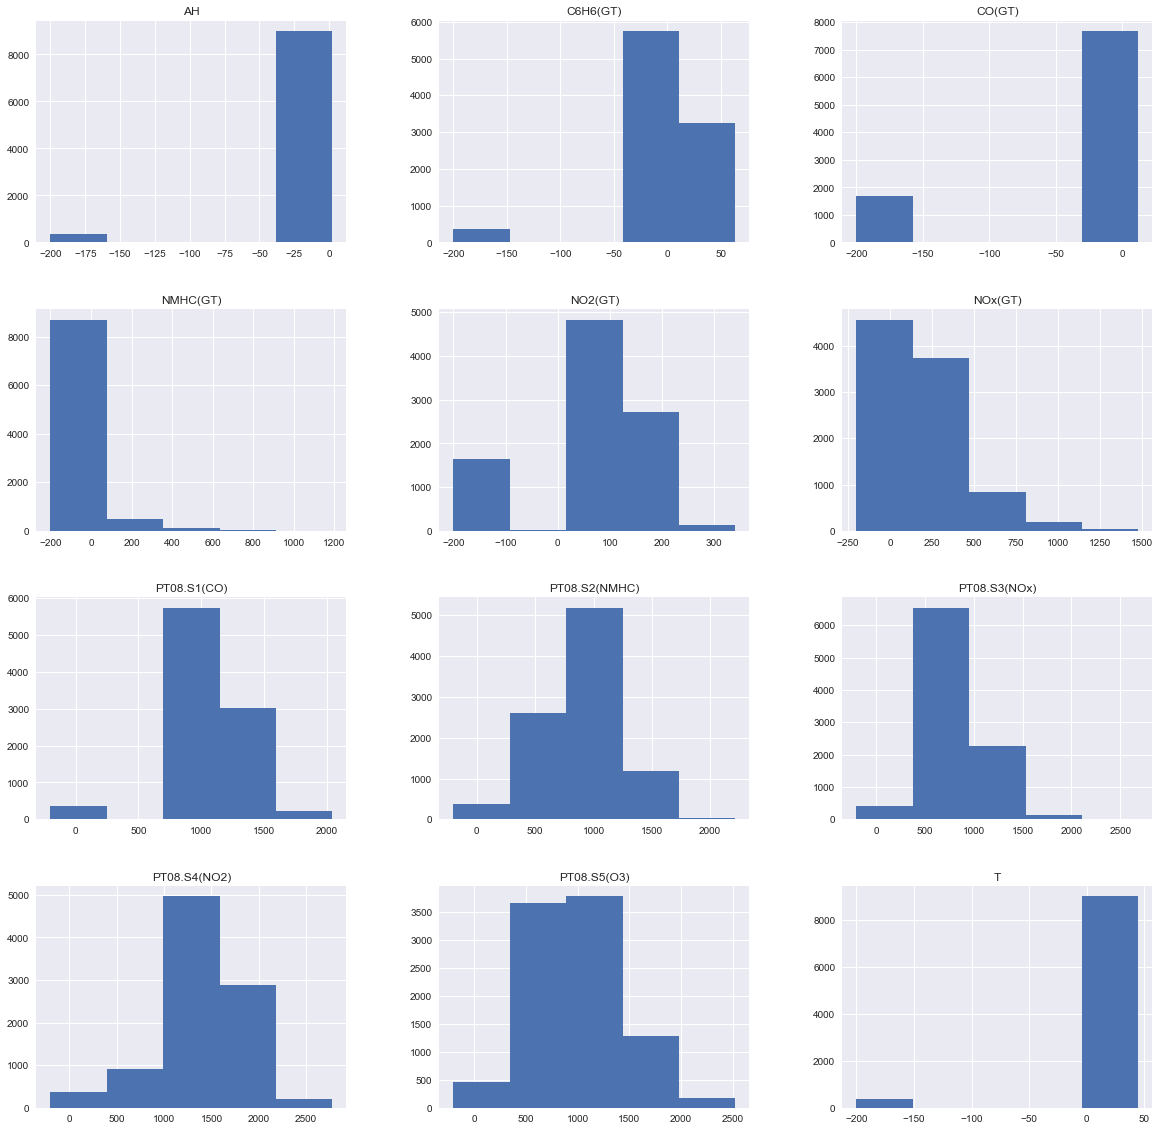

In [90]:
pd.DataFrame.hist(data, figsize=(20,20), bins = 5);

In [91]:
(data.iloc[:, 2:] == -200.0).sum()

CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
AH                366
dtype: int64

In [92]:
data.replace(-200.0, data.median(), inplace=True)#Replace missing value with median

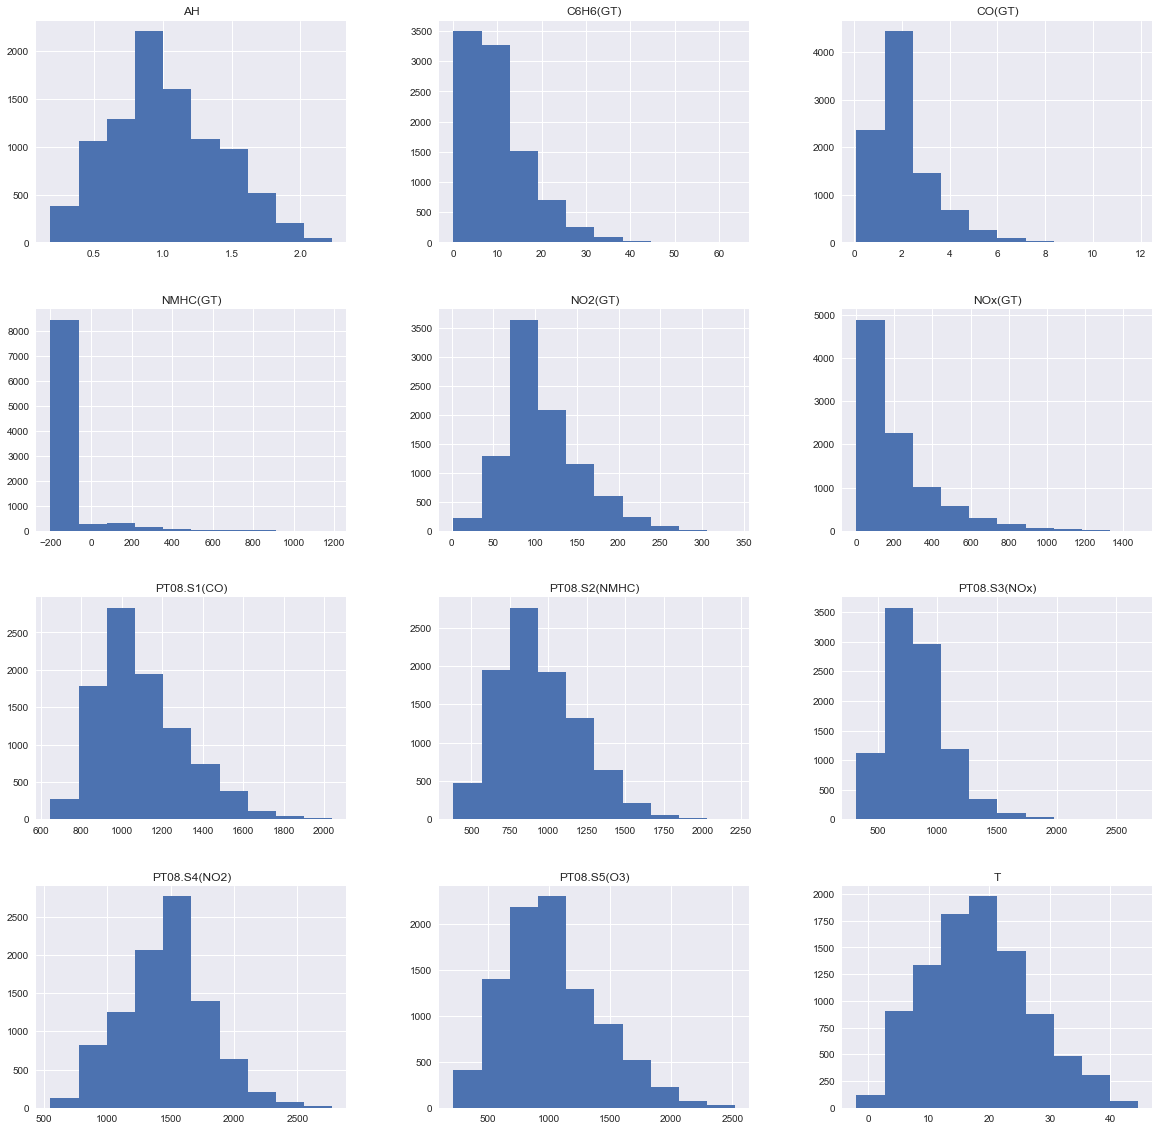

In [93]:
pd.DataFrame.hist(data, figsize=(20,20));

In [94]:
data.drop(['Date','Time','NMHC(GT)'], axis = 1).head()# Drop Date, Time and ['NMHC(GT)'] column as it has more missing columns, hence
#replacing with a median still skews the data to -200

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,AH
0,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,0.7578
1,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,0.7255
2,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,0.7502
3,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,0.7867
4,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,0.7888


In [95]:
data.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,2.035343,1098.001282,-159.090093,9.997713,937.426312,228.347547,833.870578,110.092017,1455.863097,1019.741477,18.274105,1.023624
std,1.339737,212.985308,139.789093,7.314906,261.700283,197.570902,251.872460,44.399549,339.373394,390.927152,8.660352,0.395948
min,0.100000,647.000000,-200.000000,0.100000,383.000000,2.000000,322.000000,2.000000,551.000000,221.000000,-1.900000,0.184700
25%,1.200000,941.000000,-200.000000,4.600000,743.000000,112.000000,666.000000,86.000000,1242.000000,742.000000,12.000000,0.746100
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,0.976800
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,1.296200
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,2.231000


### Choose the optimal number of clusters using a dendogram

Before attempting to solve the problem, separate the predictor features in the dataset from the target feature. That is, create a matrix, usually named X, to store the predictor values.

The code to determine the optimal number of clusters is illustrated. Given the predictor matrix, X, use the following code to determine the number of clusters.

    import scipy.cluster.hierarchy as sch
    Z = sch.linkage(X, 'ward')
    plt.figure(figsize=(12,7))
    dendogram = sch.dendrogram(Z)
    
Use the `scipy.cluster.hierarchy` package to design a dendogram. 

The option 'ward' is a distance measure that minimizes the variance between clusters.

In [96]:
X = data[['PT08.S1(CO)', 'PT08.S2(NMHC)']].values

In [97]:
X

array([[1360., 1046.],
       [1292.,  955.],
       [1402.,  939.],
       ...,
       [1142., 1063.],
       [1003.,  961.],
       [1071., 1047.]])

In [98]:
import scipy.cluster.hierarchy as  sch

In [99]:
Z = sch.linkage(X, 'ward')
plt.figure(figsize = (12,7))

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

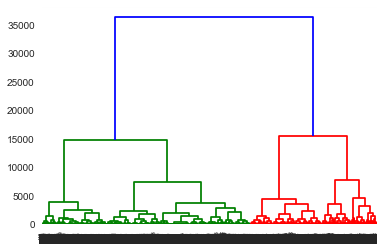

In [100]:
dendogram = sch.dendrogram(Z)

#### What is the optimal number of clusters?

The resulting diagram shows the data points on the x-axis and dissimilarity scores on the y-axis. For this exercises, let's use a dissimilarity score of 10000. A horizontal line from the threshold value intersects three branches of the dendogram. Use three as the number of clusters to for the model.

### Fit the model and do some predictions

Instead of k-Means, we'll use agglomerative clustering. Create a clustering model using the following code:

    hc = AgglomerativeClustering(n_clusters=3, linkage='ward')
    
Then fit your model and predict using the model.

In [101]:
from sklearn.cluster import AgglomerativeClustering
hc3 = AgglomerativeClustering(n_clusters = 3, linkage = 'ward')

In [102]:
labels3 = hc3.fit_predict(X)

Determine the labes of the clustering model.

In [103]:
labels3

array([2, 2, 2, ..., 2, 0, 2], dtype=int64)

### Visualize the clusters

Visualize the clusters with a scatter plot. Colour-code the different clusters. 

In [104]:
colors = {0 : 'red',
          1 : 'green',
          2 : 'blue'} # map integer label to color
label_color3 = [colors[i] for i in labels3]

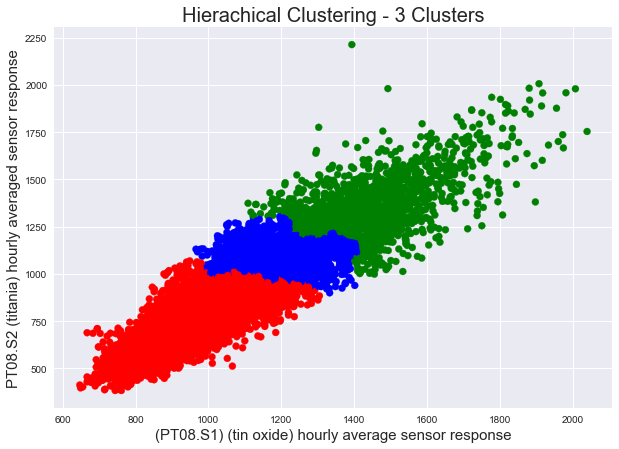

In [105]:
plt.figure('k-Means', figsize=(10,7))
plt.title('Hierachical Clustering - 3 Clusters', fontsize = 20)
plt.xlabel('(PT08.S1) (tin oxide) hourly average sensor response', fontsize = 15)
plt.ylabel('PT08.S2 (titania) hourly averaged sensor response', fontsize = 15)
plt.style.use('seaborn')
cmap = 'tab10'
plt.scatter([X[:,0]], [X[:,1]],  c = label_color3, cmap = cmap)

### Performance

In [106]:
from sklearn import metrics

In [107]:
print(metrics.silhouette_score(X, labels3))

0.4098465898927145


### Interpretation

The silhouette_score for 3 clusters is 0.4098.
Silhouette values lies in the range of [-1, 1]. A value of +1 indicates that the sample is far away from its
neighboring cluster and very close to the cluster its assigned. Hence a value of 0.4098 shows a rather good distance
of the assigned cluster and neighboring cluster. When we cluster observations, we want observations in the same group to be similar and observations in different groups to be dissimilar. 

### More clusters

Do more clusters mean anything?

Begin with 5 clusters.

In [108]:
hc5 = AgglomerativeClustering(n_clusters = 5, linkage = 'ward')

In [109]:
labels5 = hc5.fit_predict(X)

In [110]:
print(metrics.silhouette_score(X, labels5))

0.37221744445408667


In [111]:
colors = {0 : 'red',
          1 : 'green',
          2 : 'blue',
          3 : 'black',
          4 : 'yellow'} # map integer label to color
label_color5 = [colors[i] for i in labels5]

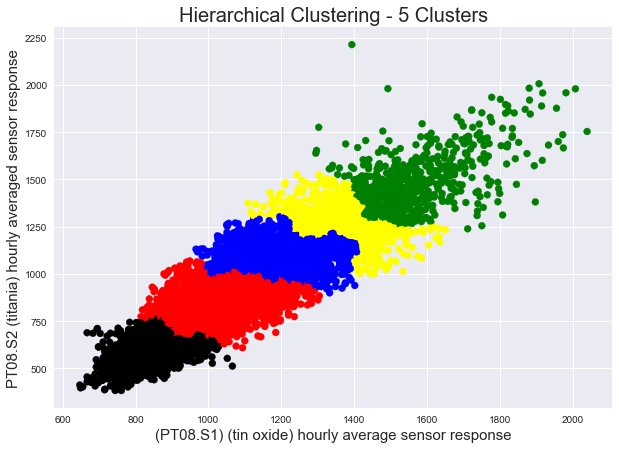

In [112]:
plt.figure('Hierarchical', figsize=(10,7))
plt.title('Hierarchical Clustering - 5 Clusters', fontsize = 20)
plt.xlabel('(PT08.S1) (tin oxide) hourly average sensor response', fontsize = 15)
plt.ylabel('PT08.S2 (titania) hourly averaged sensor response', fontsize = 15)
plt.style.use('seaborn')
cmap = 'tab10'
plt.scatter([X[:,0]], [X[:,1]],  c = label_color5, cmap = cmap)

In [113]:
hc10 = AgglomerativeClustering(n_clusters = 9, linkage = 'ward')

For 10 clusters.

In [114]:
labels10 = hc10.fit_predict(X)

In [115]:
print(metrics.silhouette_score(X, labels10))

0.2919130742517188


In [116]:
colors = {0 : 'red',
          1 : 'green',
          2 : 'blue',
          3 : 'black',
          4 : 'yellow',
          5 : 'orange',
          6 : 'pink',
          7 : 'brown',
          8 : 'purple',
          9 : 'cyan'} # map integer label to color
label_color10 = [colors[i] for i in labels10]

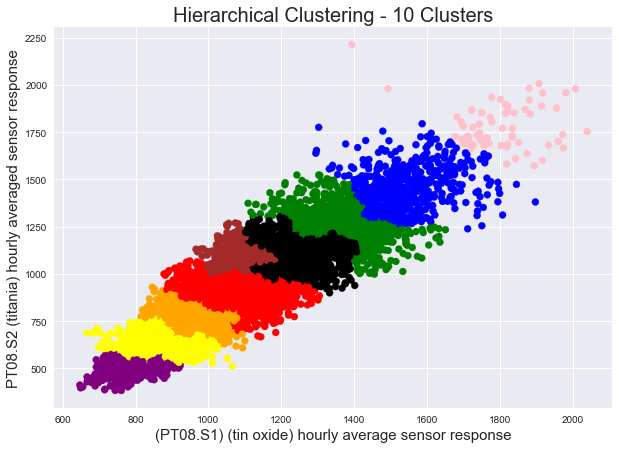

In [117]:
plt.figure('Hierarchical', figsize=(10,7))
plt.title('Hierarchical Clustering - 10 Clusters', fontsize = 20)
plt.xlabel('(PT08.S1) (tin oxide) hourly average sensor response', fontsize = 15)
plt.ylabel('PT08.S2 (titania) hourly averaged sensor response', fontsize = 15)
plt.style.use('seaborn')
cmap = 'tab10'
plt.scatter([X[:,0]], [X[:,1]],  c = label_color10, cmap = cmap)

Prove a interpretation for the performance variation when the number of clusters are increased.

## Additional material

[Machine learning in GIS. Hierarchical Clustering for Urban Brownfields analysis.](https://www.linkedin.com/pulse/machine-learning-gis-hierarchical-clustering-urban-bielinskas)

In [152]:
#Calculating the number of clusters using Silhouette Analysis and K-Means Clustering
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12 ,13, 14, 15, 16, 17, 18, 19, 20]
from sklearn.metrics import silhouette_score, silhouette_samples

In [153]:
import matplotlib.cm as cm
from sklearn.cluster import KMeans
clusters = []
coeff = []

For n_clusters = 2 The average silhouette_score is : 0.5432372240132242
For n_clusters = 3 The average silhouette_score is : 0.47549144503325064
For n_clusters = 4 The average silhouette_score is : 0.44678064074459
For n_clusters = 5 The average silhouette_score is : 0.41596454299254665
For n_clusters = 6 The average silhouette_score is : 0.3799986188333311
For n_clusters = 7 The average silhouette_score is : 0.36433857858775526
For n_clusters = 8 The average silhouette_score is : 0.36423559563187297
For n_clusters = 9 The average silhouette_score is : 0.3397971545556749
For n_clusters = 10 The average silhouette_score is : 0.3407861753010898
For n_clusters = 11 The average silhouette_score is : 0.34051810184590814
For n_clusters = 12 The average silhouette_score is : 0.3493991073136333
For n_clusters = 13 The average silhouette_score is : 0.33910232025986153
For n_clusters = 14 The average silhouette_score is : 0.34158738894297386
For n_clusters = 15 The average silhouette_score is : 

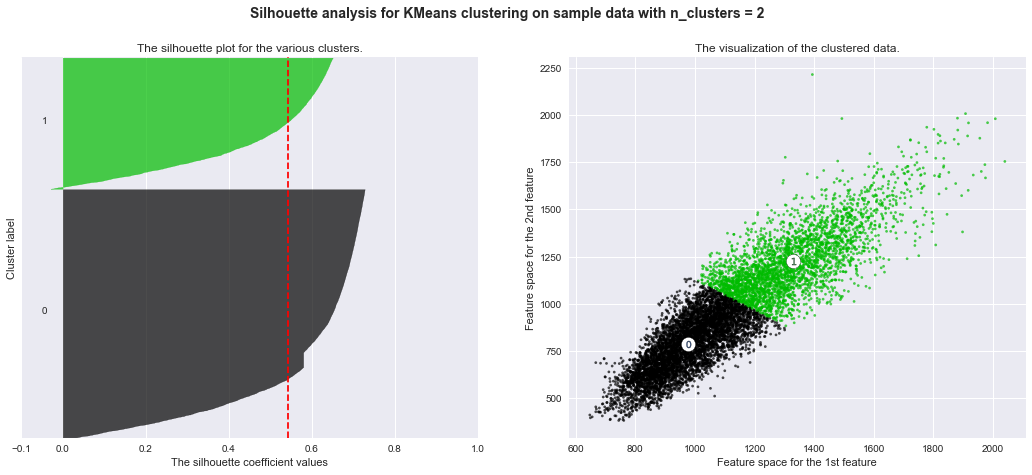

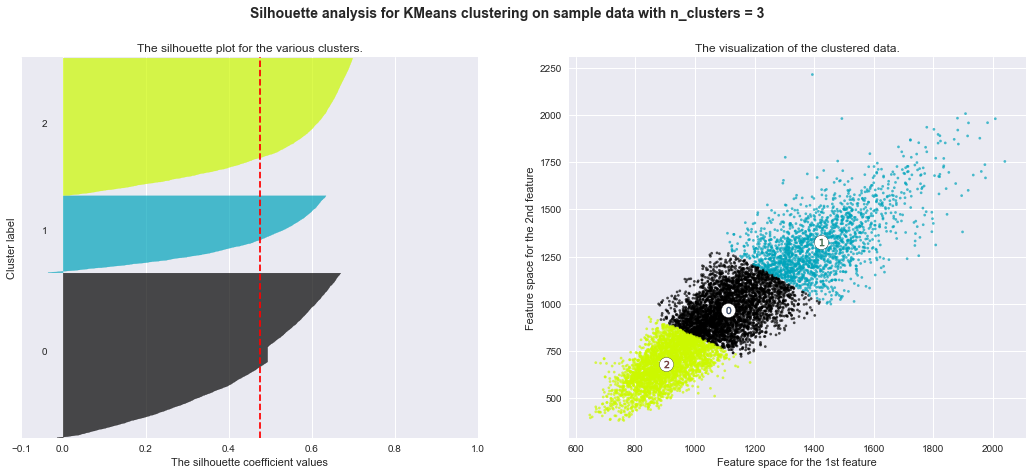

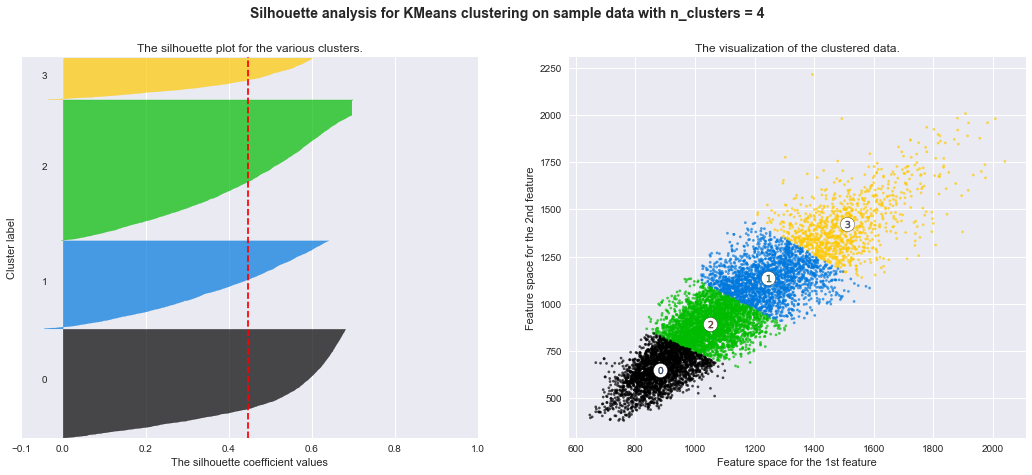

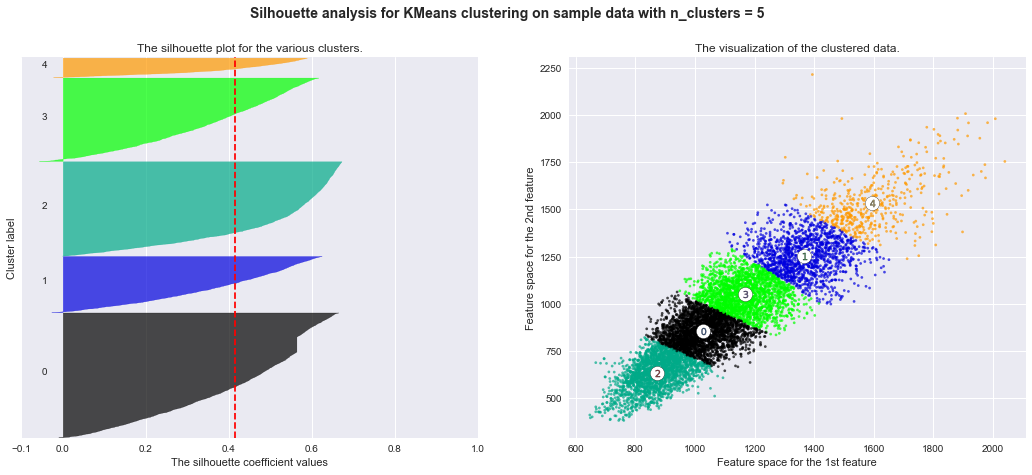

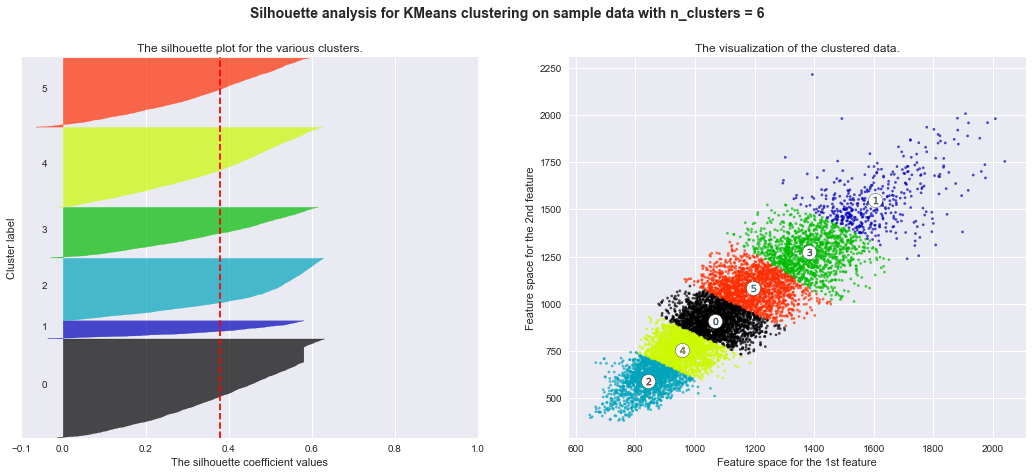

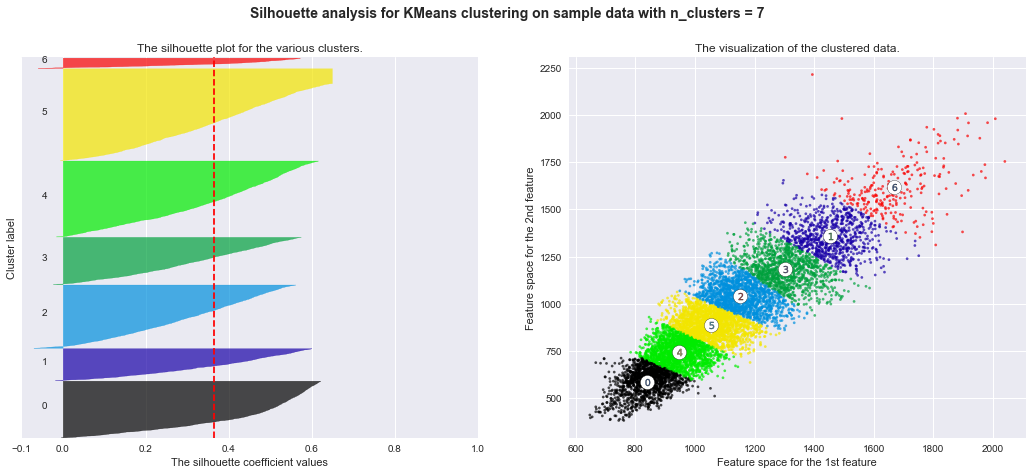

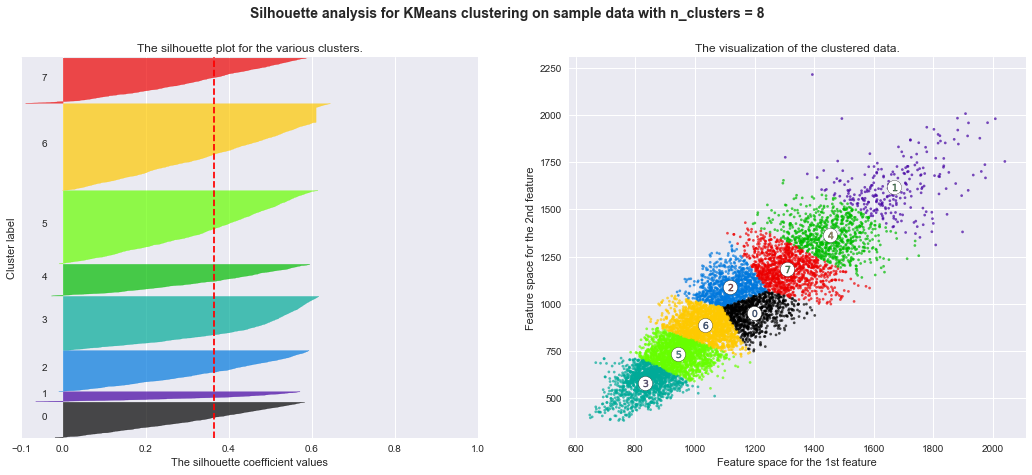

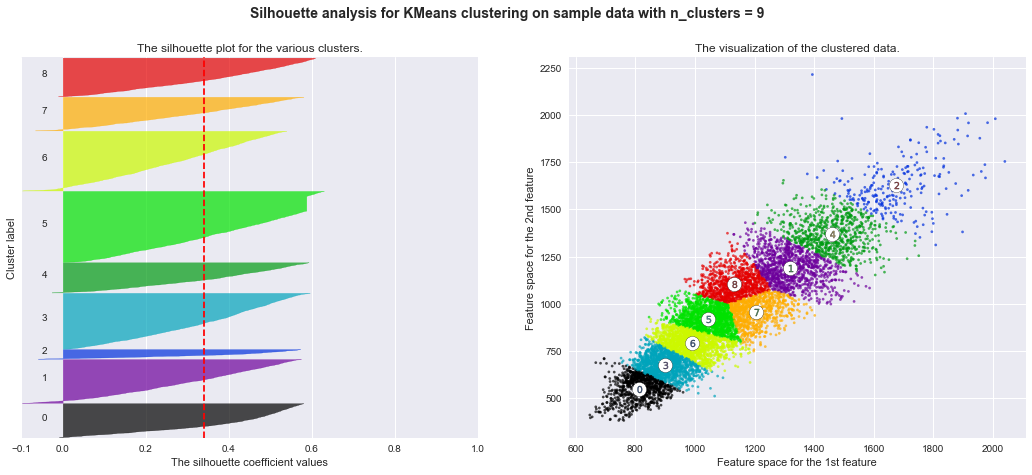

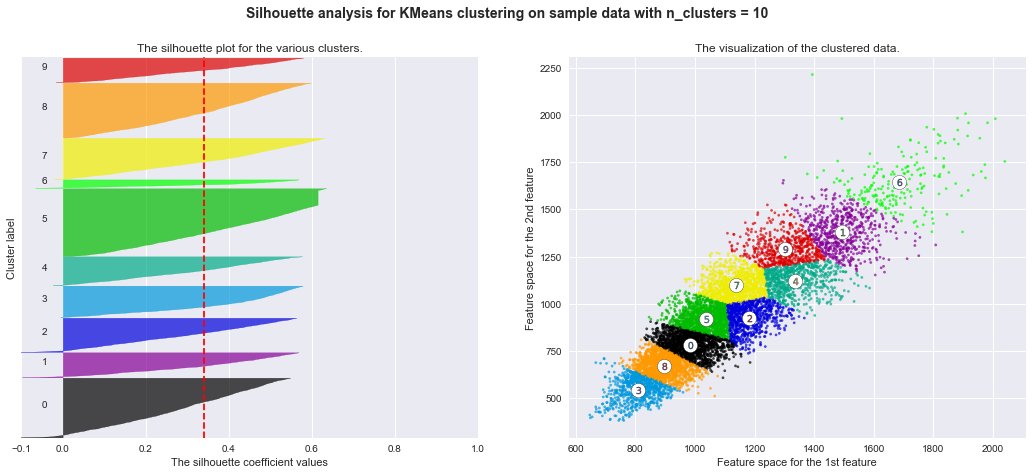

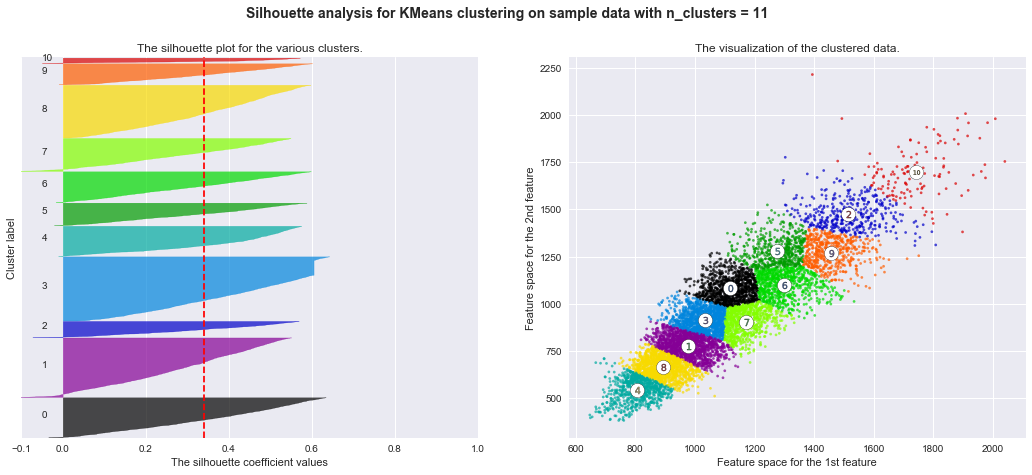

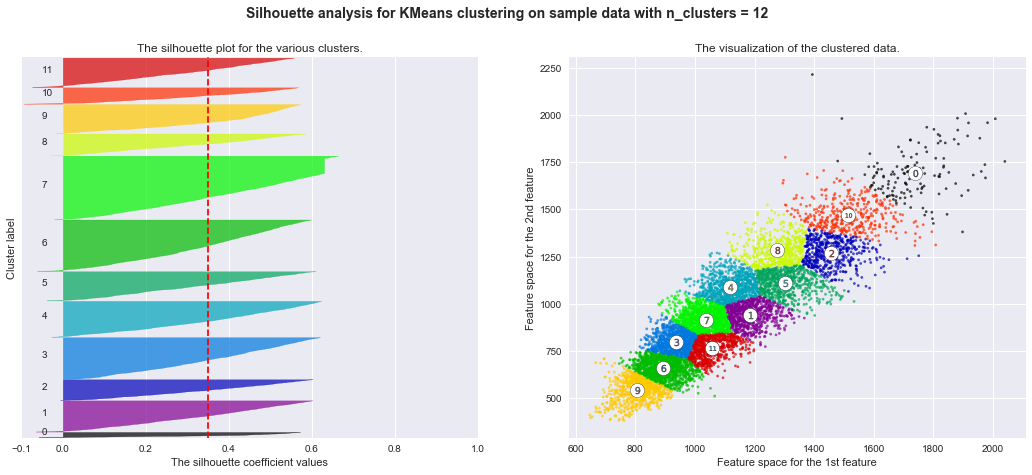

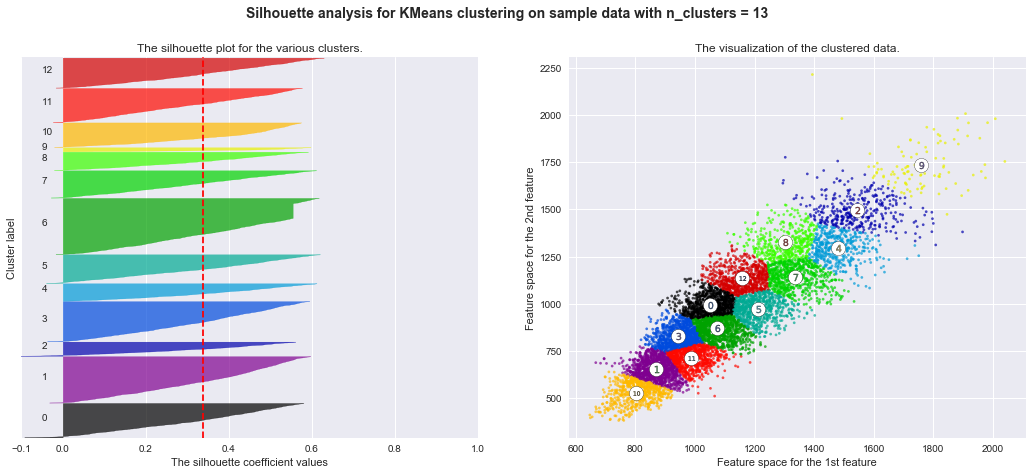

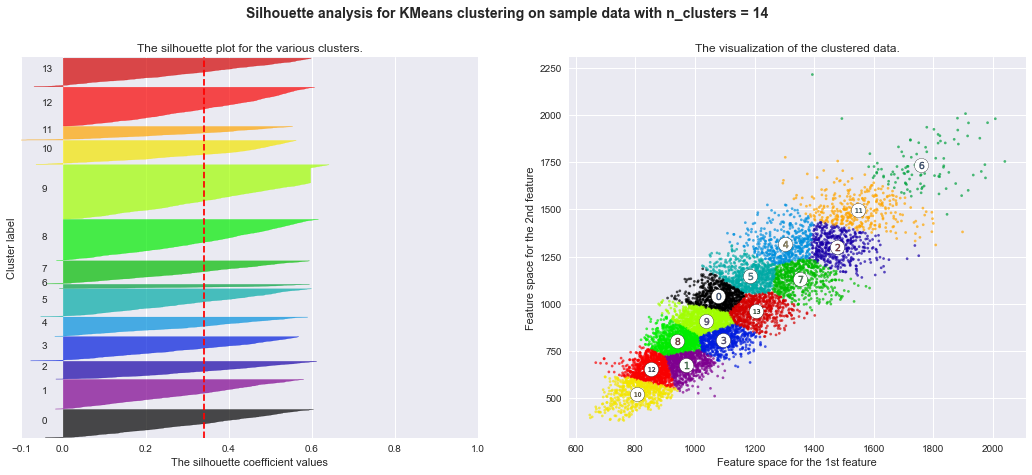

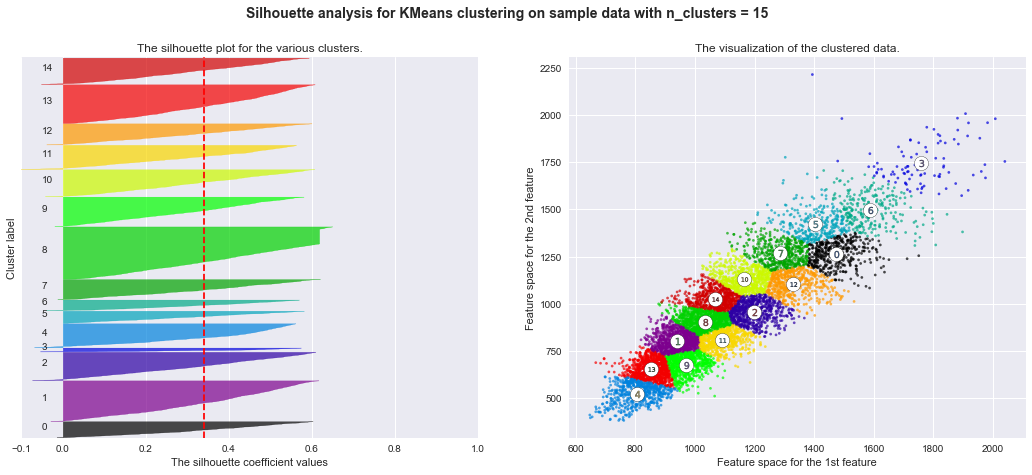

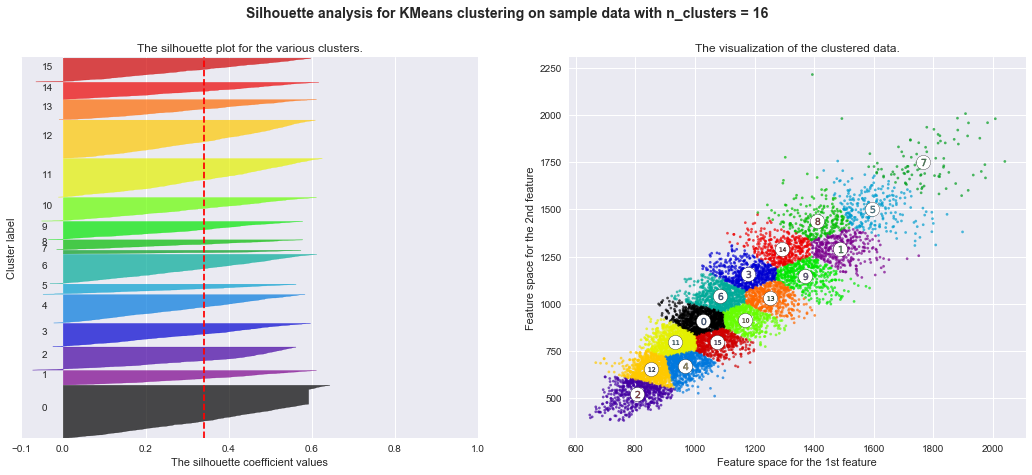

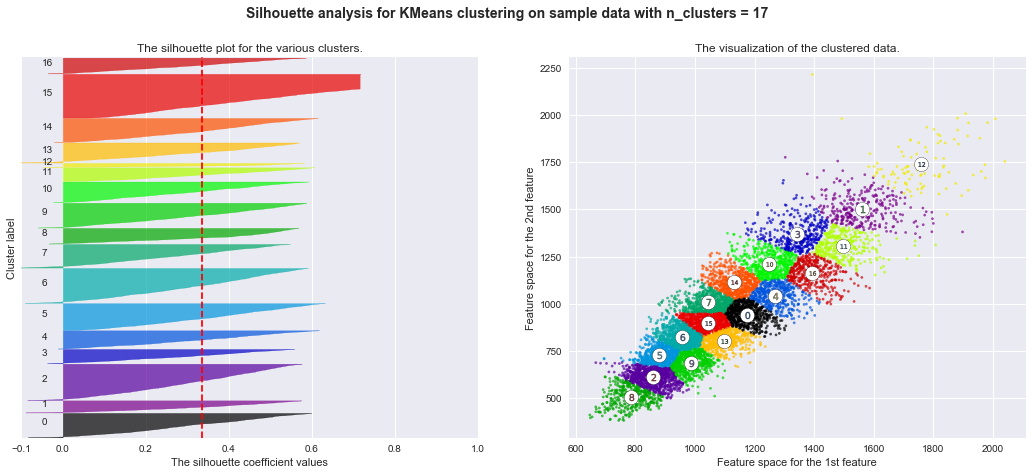

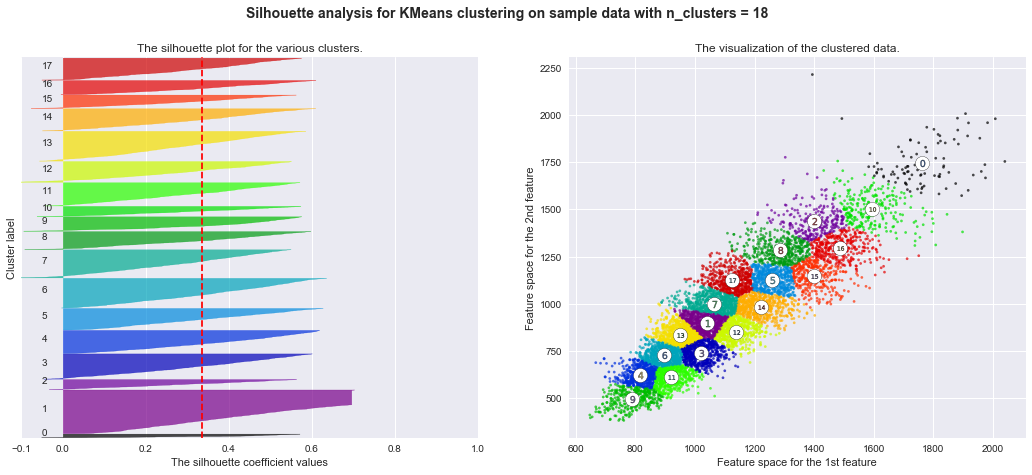

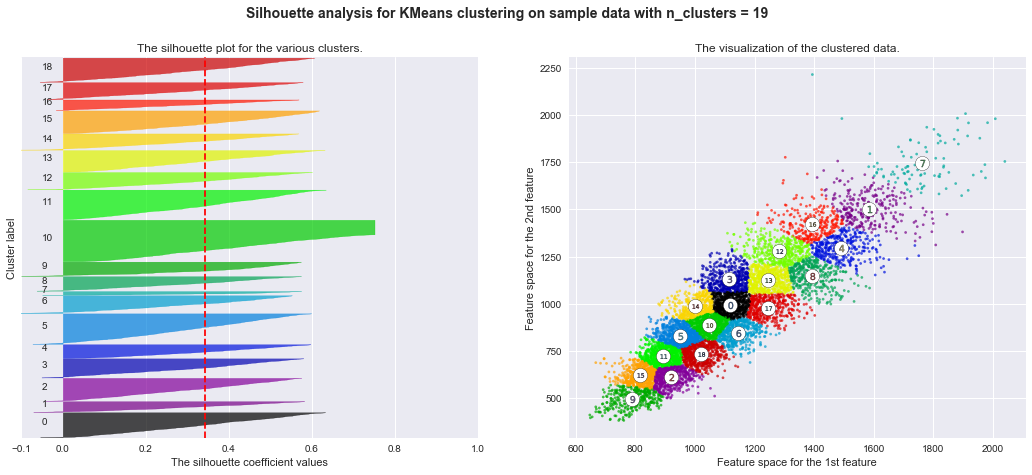

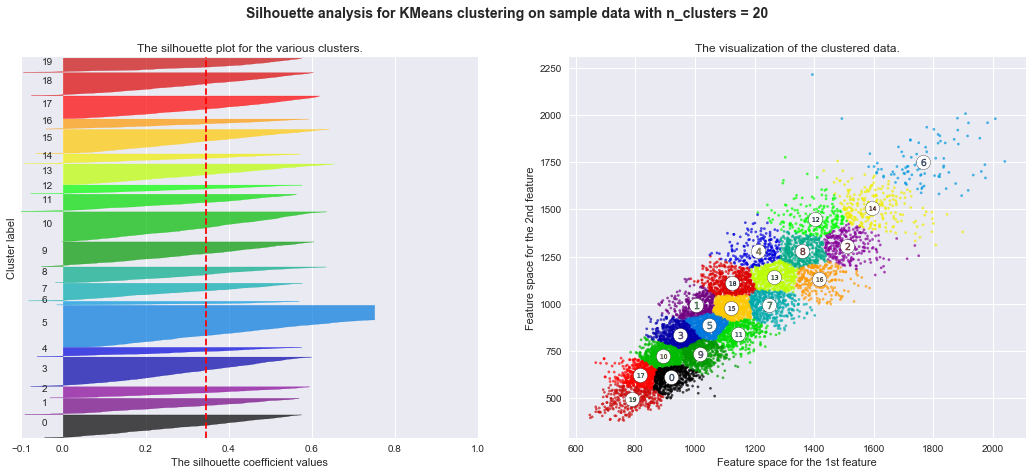

In [154]:
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state = 10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    clusters.append(n_clusters)
    coeff.append(silhouette_avg)
    
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)


    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()


Text(0, 0.5, 'Silhouette Coefficient')

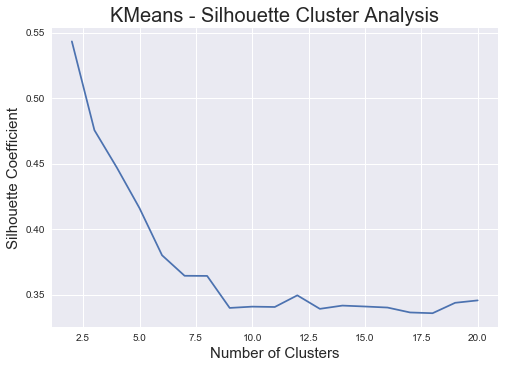

In [145]:
plt.plot(clusters, coeff)
plt.title('KMeans - Silhouette Cluster Analysis', fontsize = 20)
plt.xlabel('Number of Clusters', fontsize = 15)
plt.ylabel('Silhouette Coefficient', fontsize = 15)

The silhouette coefficient doesnt change much from 9 clusters onwards. However, the scientific consensus is that the higher the silhouette coefficient, that is the optimum number of clusters. In this case, the optimum number of clusters for this data is 2 clusters. The plots obey the following rules when 2 clusters are chosen:

<b> Firstly, The mean value should be as close to 1 as possible
<b> Secondly, The plot of each cluster should be above the mean value as much as possible. Any plot region below the mean value is not desirable.
<b> Lastly, the width of the plot should be as uniform as possible.

The following source was used:
https://kapilddatascience.wordpress.com/2015/11/10/using-silhouette-analysis-for-selecting-the-number-of-cluster-for-k-means-clustering/

There seems to be a conflict in the analysis of n_clusters using KMeans Elbow method, which gave 5 optimum clusters and silhouette_score
which gives an optimum 2 clusters. Looking at the silhouette cluster plots, 5 clusters show non-uniformly distributed subgroup data.
I think the best number of clusters is 2 as per dendogram and silhouette analysis